


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/10


57/57 [==============================] - 861s 14s/step - loss: 0.6936 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 2/10
57/57 [==============================] - 836s 15s/step - loss: 0.6934 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.4978
Epoch 3/10
57/57 [==============================] - 900s 16s/step - loss: 0.6933 - accuracy: 0.4862 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 4/10
57/57 [==============================] - 876s 15s/step - loss: 0.6934 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
57/57 [==============================] - 798s 14s/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
57/57 [==============================] - 792s 14s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 7/10
57/57 [==============================] - 876s 15s

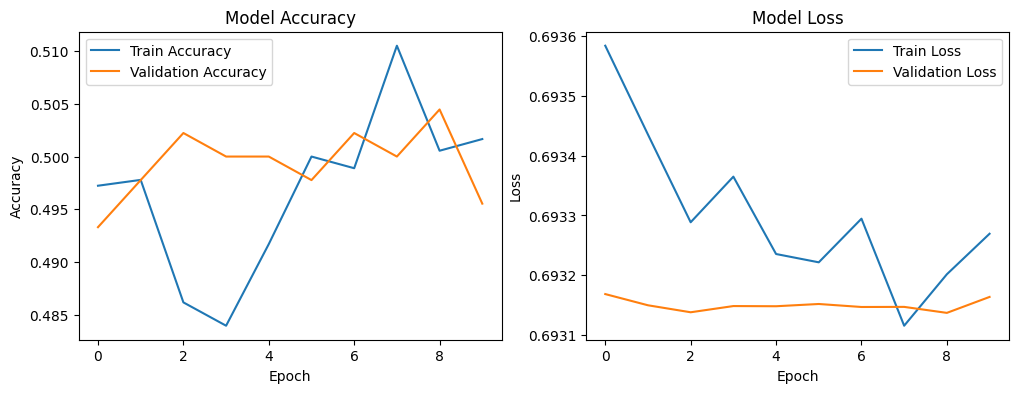

C:\Users\saura\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to data1a.h5 (HDF5 format)


In [1]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DIR = 'data1a/training'
VAL_DIR = 'data1a/validation'
MODEL_SAVE_PATH = 'data1a'  # Directory for saving the model

# Load and build a VGG16-like model
def build_vgg16(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)):
    model = Sequential()
    
    # Layer 1-2
    model.add(ZeroPadding2D((1, 1), input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Layer 3-5
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Layer 6-9
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Layer 10-13
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Layer 14-17
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Compile the model
model = build_vgg16()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Data loading
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='binary')
val_generator = val_datagen.flow_from_directory(VAL_DIR, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='binary')

# Training the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // BATCH_SIZE, epochs=EPOCHS,
                    validation_data=val_generator, validation_steps=val_generator.samples // BATCH_SIZE)

# Plotting training metrics
def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

# Saving the model in TensorFlow SavedModel format
#model.save(MODEL_SAVE_PATH, save_format='tf')
#print(f"Model saved to {MODEL_SAVE_PATH} (TensorFlow SavedModel format)")

# Saving the model in HDF5 format
model.save(f"{MODEL_SAVE_PATH}.h5")
print(f"Model saved to {MODEL_SAVE_PATH}.h5 (HDF5 format)")
